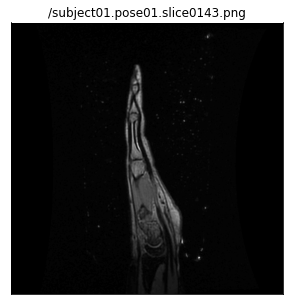

In [2]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact

data_path = "/Users/ryotaro/Desktop/MRI_prj/subject01"
pose      = "/pose01"
file_name = "/subject01.pose01.slice0143.png"

test_img_path = data_path + pose + file_name
test_img = cv2.imread(test_img_path, 0)

plt.figure(figsize=(5,5))
plt.title(file_name)
plt.xticks([]), plt.yticks([])
plt.imshow(test_img, cmap="gray")

In [3]:
def contour_ditector(gray_img, epsilon_rate=0.0001, err_permission=15):
    selected_contours = []
    contours, _ = cv2.findContours(gray_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < err_permission:
            pass
        else:
            approx = cv2.approxPolyDP(cnt, epsilon_rate*cv2.arcLength(cnt, True), True)
            rgb_img = cv2.drawContours(rgb_img, [approx], 0, (255,0,0), 1)
            selected_contours.append(cnt)
    return rgb_img, selected_contours

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

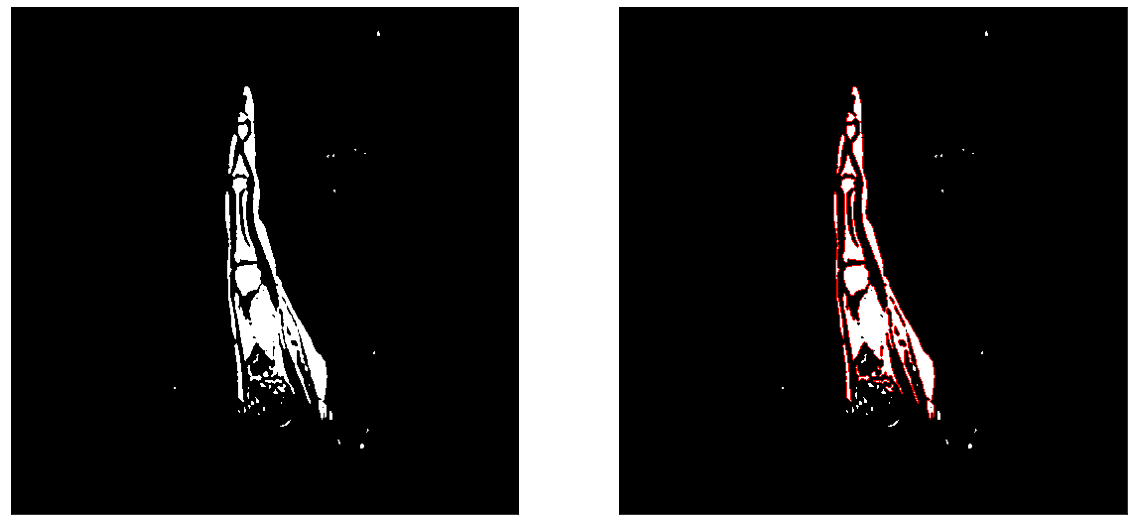

In [4]:
# global thresholding
plt.figure(figsize=(20,15))
_, th1 = cv2.threshold(test_img, 15, 255,cv2.THRESH_BINARY)
plt.subplot(1,2,1), plt.imshow(th1, cmap="gray")
plt.xticks([]), plt.yticks([])

indicated_img, contours = contour_ditector(th1)
plt.subplot(1,2,2), plt.imshow(indicated_img)
plt.xticks([]), plt.yticks([])

In [48]:
mouse = np.array([270, 380])
c0 = contours[0]
c0=c0.reshape((15,2))
c0

array([[274, 381],
       [274, 383],
       [273, 384],
       [271, 384],
       [270, 383],
       [269, 383],
       [268, 384],
       [272, 388],
       [275, 388],
       [275, 387],
       [274, 386],
       [274, 385],
       [276, 383],
       [276, 382],
       [275, 381]], dtype=int32)

In [49]:
distance = np.sqrt(((c0-mouse)[:,0])**2 + ((c0-mouse)[:,1])**2)
c0[np.argmin(distance)]

array([270, 383], dtype=int32)

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

<IPython.core.display.Javascript object>


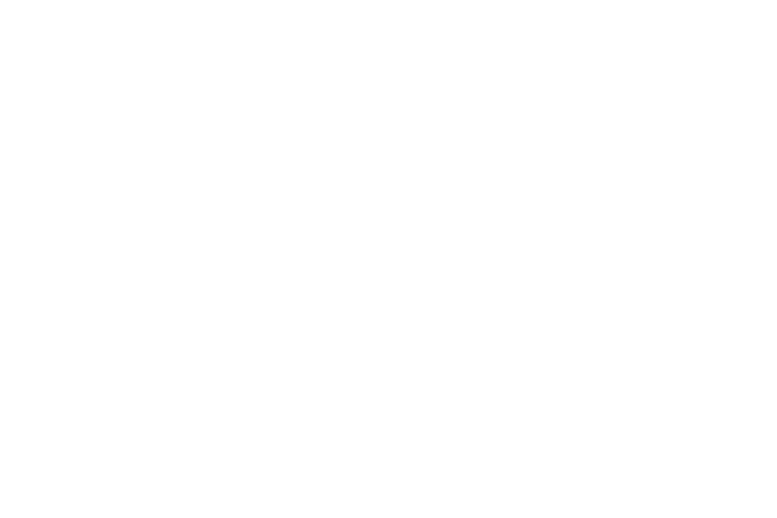

<IPython.core.display.Javascript object>


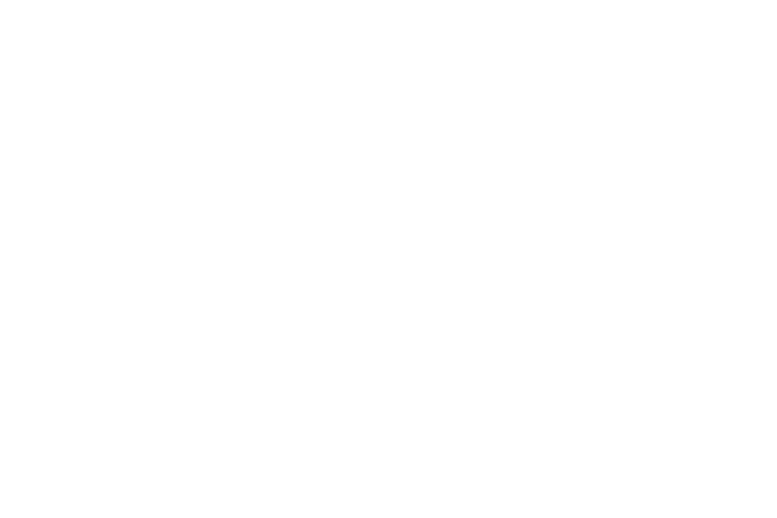

In [6]:
## Set figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

ax.set_xlim(100, 500)
ax.set_ylim(0,   500)
ax.set_zlim(0, 20)

## Draw contour
for cnt in contours:
    x = cnt[:,:,0][:,0]
    y = cnt[:,:,1][:,0]
    z = np.zeros_like(x)
    ax.add_collection3d(Poly3DCollection([list(zip(x,y,z))], color='r',alpha=0.4))
plt.show()

### すべての画像の輪郭を3D表示してみる

In [23]:
def get_contours_xyz(gray_img, z_pos, epsilon_rate=0.0001, err_permission=15):
    contours, _ = cv2.findContours(gray_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    coordination = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < err_permission:
            pass
        else:
            approx = cv2.approxPolyDP(cnt, epsilon_rate*cv2.arcLength(cnt, True), True)            
            x = cnt[:,:,0][:,0]
            y = cnt[:,:,1][:,0]
            z = np.full_like(x, z_pos)
            coordination.append(list([x, y, z]))
    return coordination

In [24]:
import os

threshold = 15
contents    = os.listdir(data_path + pose)
images_list = [f for f in contents if (os.path.isfile(os.path.join(data_path + pose, f)) and f.endswith('.png'))]

layers_list = []
for i, img in enumerate(images_list):
    to_img = data_path + pose + "/" + img
    bgr_img = cv2.imread(to_img, 0)
    _, gray_img = cv2.threshold(bgr_img, threshold, 255,cv2.THRESH_BINARY)
    contours_coordination = get_contours_xyz(gray_img, i)
    layers_list.append(contours_coordination)

<IPython.core.display.Javascript object>


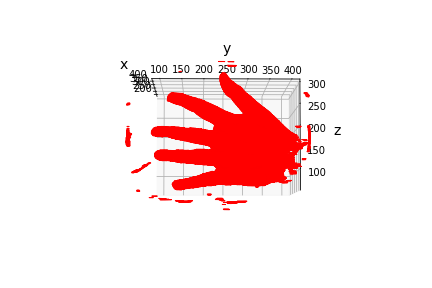

In [25]:
## Set figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

ax.set_xlim(100, 500)
ax.set_ylim(0,   500)
ax.set_zlim(-10, len(images_list))

for one_layer_contour in layers_list:
    for contour in one_layer_contour:
        x = contour[0].tolist()
        y = contour[1].tolist()
        z = contour[2].tolist()
        ax.add_collection3d(Poly3DCollection([list(zip(x,y,z))], color='r',alpha=0.4))
plt.show()